In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [3]:
# import sklearn's california housing data
from sklearn.datasets import fetch_california_housing

In [27]:
# Load the California housing dataset
# data = fetch_california_housing()
# X, y = data.data, data.target

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [28]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [29]:
y.head(3)

0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64

In [30]:
type(y)

pandas.core.series.Series

In [32]:
y = pd.DataFrame(y)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [36]:
df = X.copy()
df['MedHouseVal'] = y

df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


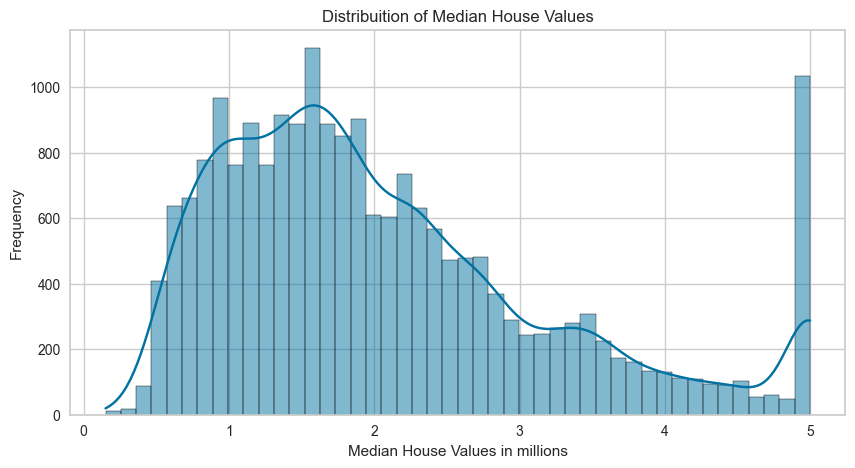

In [38]:
# visualize a distribution of the Median House Values in California
plt.figure( figsize=(10, 5))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribuition of Median House Values')
plt.ylabel('Frequency')
plt.xlabel('Median House Values in millions')
plt.show()

In [39]:
experiment = setup(df, target = 'MedHouseVal', session_id=40)

,Description,Value
0,Session id,40
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [40]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3101,0.2146,0.4629,0.8375,0.1404,0.1754,0.2600
xgboost,Extreme Gradient Boosting,0.3146,0.2226,0.4715,0.8314,0.1427,0.1761,0.9430
et,Extra Trees Regressor,0.3282,0.2485,0.4982,0.8117,0.1468,0.1817,1.5550
rf,Random Forest Regressor,0.3371,0.2629,0.5124,0.8008,0.1531,0.1913,6.0960
gbr,Gradient Boosting Regressor,0.3664,0.2803,0.5291,0.7878,0.1616,0.2099,1.4660
br,Bayesian Ridge,0.5268,0.5209,0.7214,0.6054,0.2221,0.3150,0.0130
lr,Linear Regression,0.5267,0.5210,0.7215,0.6053,0.2221,0.3150,0.5700
ridge,Ridge Regression,0.5267,0.5209,0.7215,0.6053,0.2221,0.3150,0.0110
lar,Least Angle Regression,0.5248,0.5233,0.7229,0.6035,0.2215,0.3121,0.0110
dt,Decision Tree Regressor,0.4782,0.5541,0.7442,0.5806,0.2191,0.2642,0.0580


In [41]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

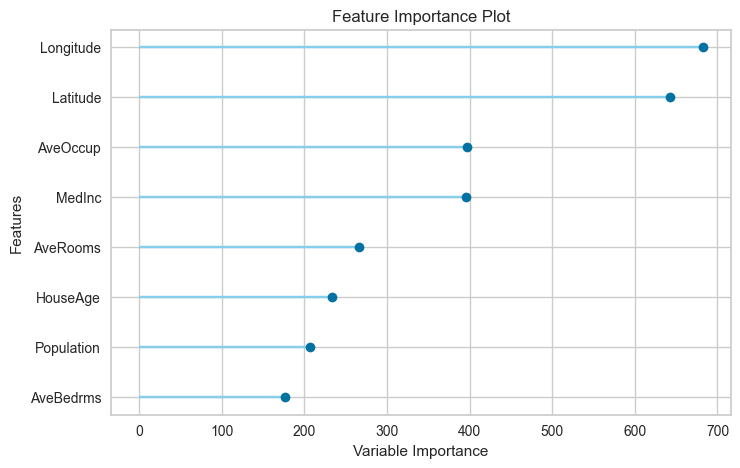

In [42]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [43]:
# save model
save_model(best_model, 'my_california_house_price_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LGBMRegressor(random_state=40))]),
 'my_california_house_price_model.pkl')